## <font color="red"> Bonus Exercise</font>

### <font color="blue"> Question a)</font>


#### Numerical Resolution

In [8]:
from scipy.optimize import fsolve
import numpy as np

# Define the parameters
c = 0.7 / 3600  # converting h^-1 to s^-1
b = 20 / 1000  # converting mg/L to g/L
a = 0.5  # g_dw/g_substrate, dimensionless
alpha = 0.1  # unitless or per time unit, here treated as unitless
beta = 0.02 / 3600  # converting h^-1 to s^-1 for consistent time units
d = 1  # g/L
e = 0  # g/L

# Define the equation to solve
def equation(x):
    term1 = -a * ((b * (c - x) + b * x) / (c - x)**2) * (alpha * x**2 + beta * x)
    term2 = a * (d - (b * x) / (c - x)) * (2 * alpha * x + beta)
    return term1 + term2

# Initial value for x
initial_guess = 1.63e-4

# Use fsolve to find the root of the equation
x_solution = fsolve(equation, initial_guess)

# Convert x from s^{-1} to h^{-1} for printing
x_in_hours = x_solution[0] * 3600

# Print the value of x that satisfies the equation, formatted to four decimal places
print(f"The optimal value of dilution rate that satisfies the equation and thereby maximizes product formation productivity (PD_max) is: {x_solution[0]:.2e} s⁻¹ ({x_in_hours:.2e} h⁻¹)")

The optimal value of dilution rate that satisfies the equation and thereby maximizes product formation productivity (PD_max) is: 1.73e-04 s⁻¹ (6.23e-01 h⁻¹)


#### Graphical Resolution

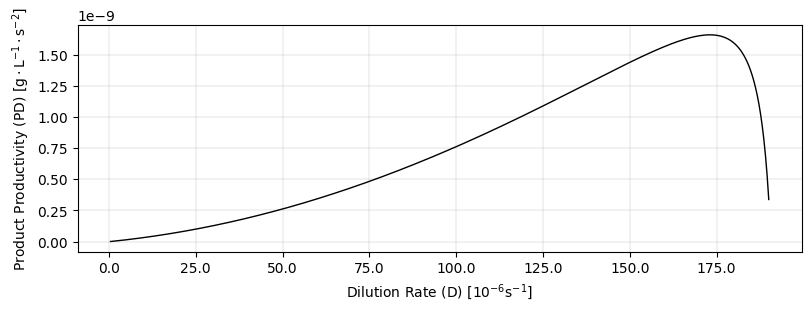

The optimal dilution rate (D_opt) for which product formation productivity is maximized (PD_max) is: 1.71e-04 s⁻¹ (6.17e-01 h⁻¹)
The maximum value of product formation productivity (PD_max) is: 1.66e-09 g·L⁻¹·s⁻²


In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.ticker as ticker
from cycler import cycler

# Setting up the plot parameters
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['axes.prop_cycle'] = cycler(color=['black'])
plt.rcParams.update({'font.size': 10})
plt.rcParams['grid.linewidth'] = 0.25
plt.rcParams['grid.linestyle'] = '-'

# Define the parameters
c = 0.7 / 3600  # converting h^-1 to s^-1
b = 20 / 1000  # converting mg/L to g/L
a = 0.5  # g_dw/g_substrate, dimensionless
alpha = 0.1  # unitless or per time unit, here treated as unitless
beta = 0.02 / 3600  # converting h^-1 to s^-1 for consistent time units
d = 1  # g/L
e = 0  # g/L

# Define the function y = f(x)
def function_y(x):
    if x == c:
        return 0  # Avoid division by zero
    term = (d - (b * x) / (c - x))
    return alpha * a * term * x**2 + beta * a * x * term

# Plotting function f(x) over a range of x where y > 0
x_values = np.linspace(0, 0.00019, 400)  # Range adjusted to avoid a potential singularity at c and get reasonable values for D
y_values = [function_y(x) for x in x_values if function_y(x) > 0]
x_values_filtered = [x for x in x_values if function_y(x) > 0]

plt.figure()
plt.plot(x_values_filtered, y_values, label="y=f(x)", color='black', linestyle='-')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e6:.1f}'))
plt.xlabel(r"Dilution Rate (D) [$10^{-6} \mathrm{s}^{-1}$]")  # Adjust the scale factor
plt.ylabel(r"Product Productivity (PD) [$\mathrm{g \cdot L}^{-1} \cdot \mathrm{s}^{-2}$]")
plt.grid(True)

# Save
plt.savefig('output_plot.png', format='png', dpi=300)

# Display the plot
plt.show()

# Find x such that y = y_max
initial_guess = [1.6e-4]  # Setting an initial guess
result = minimize(lambda x: -function_y(x), initial_guess, bounds=[(0, c - 0.00001)])

# Convert x from s^{-1} to h^{-1} for printing
x_in_hours = result.x[0] * 3600

# Print the results with an appropriate formatting
print(f"The optimal dilution rate (D_opt) for which product formation productivity is maximized (PD_max) is: {result.x[0]:.2e} s⁻¹ ({x_in_hours:.2e} h⁻¹)")
print(f"The maximum value of product formation productivity (PD_max) is: {-result.fun:.2e} g·L⁻¹·s⁻²")